In [1]:
### Load relevant packages
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as smf
import statsmodels.api         as sm
import scipy

!pip install linearmodels

from linearmodels import PanelOLS
from linearmodels import RandomEffects


In [3]:
datafinal = pd.read_csv('data-final-depurado.csv', encoding = "UTF-8")

C:\Users\margu\anaconda3\envs\case_1.2_var2\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
datafinal.columns

Index(['Unnamed: 0', 'ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO',
       'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_COLE_TERMINO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PAGOMATRICULABECA',
       'ESTU_PAGOMATRICULACREDITO', 'ESTU_PAGOMATRICULAPADRES',
       'ESTU_PAGOMATRICULAPROPIO', 'ESTU_SIMULACROTIPOICFES',
       'ESTU_ACTIVIDADREFUERZOAREAS', 'ESTU_ACTIVIDADREFUERZOGENERIC',
       'ESTU_TIPODOCUMENTOSB11', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_HORASSEMANATRABAJA',
       'INST_COD_INSTITUCION', 'INST_NOMBRE_INSTITUCION',
       'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_CODMUNICIPIO', 'ESTU_PRGM_MUNICIPIO',
       'ESTU_PRGM_DEPARTAMENTO', 'ESTU_NIVEL_PRGM_ACADEMICO',
       'ESTU_ME

In [4]:
datafinal.head()

,Unnamed: 0,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA
0,0,CC,COLOMBIA,F,24/11/1994,20163,EK201630197609,ESTUDIANTE,CUNDINAMARCA,25.0,...,155.0,A2,62.0,151.0,3,43.0,PUBLICAR,2016,SaberPro,Normal
1,1,CC,COLOMBIA,M,11/06/1991,20163,EK201630241417,ESTUDIANTE,BOGOTA,11.0,...,153.0,A2,59.0,220.0,4,100.0,PUBLICAR,2016,SaberPro,Normal
2,2,CC,COLOMBIA,F,22/02/1995,20163,EK201630080363,ESTUDIANTE,NORTE SANTANDER,54.0,...,120.0,-A1,16.0,162.0,3,72.0,PUBLICAR,2016,SaberPro,Normal
3,3,CC,COLOMBIA,M,01/08/1994,20163,EK201630081694,ESTUDIANTE,BOGOTA,11.0,...,214.0,B2,98.0,112.0,1,8.0,PUBLICAR,2016,SaberPro,Normal
4,4,CC,COLOMBIA,M,18/08/1980,20163,EK201630079620,ESTUDIANTE,BOLIVAR,13.0,...,184.0,B1,84.0,158.0,3,53.0,PUBLICAR,2016,SaberPro,Normal


In [4]:
datafinal.shape

(1502154, 64)

In [6]:
for column in datafinal.columns:
    print(f'Column: {column}')
    print(datafinal[column].astype(str).sort_values().value_counts())
    print('\n')

Column: Unnamed: 0
3261      12
49352     12
37617     12
26918     12
35300     12
          ..
252381     1
249426     1
249892     1
256869     1
251430     1
Name: Unnamed: 0, Length: 260241, dtype: int64


Column: ESTU_TIPODOCUMENTO
CC     1474809
TI       22811
CR        2293
CE        1905
PE         264
PC          66
PEP          3
NES          2
V            1
Name: ESTU_TIPODOCUMENTO, dtype: int64


Column: ESTU_NACIONALIDAD
COLOMBIA          1499749
VENEZUELA             816
ESTADOS UNIDOS        217
ECUADOR               167
FRANCIA               156
                   ...   
SANTA LUCÍA             1
INDIA                   1
JAMAICA                 1
ARGELIA                 1
UCRANIA                 1
Name: ESTU_NACIONALIDAD, Length: 91, dtype: int64


Column: ESTU_GENERO
F      857779
M      644063
ND        282
nan        30
Name: ESTU_GENERO, dtype: int64


Column: ESTU_FECHANACIMIENTO
01/01/1900                862
10/10/1995                413
08/11/1994             

Estrato 2      552118
Estrato 3      442073
Estrato 1      283503
Estrato 4      115033
nan             44370
Estrato 5       38555
Estrato 6       19503
Sin Estrato      4680
Estrato 0        2165
Zona Rural        154
Name: FAMI_ESTRATOVIVIENDA, dtype: int64


Column: FAMI_TIENEINTERNET
Si     1179828
No      289886
nan      32440
Name: FAMI_TIENEINTERNET, dtype: int64


Column: FAMI_TIENECOMPUTADOR
Si     1256366
No      211426
nan      34362
Name: FAMI_TIENECOMPUTADOR, dtype: int64


Column: FAMI_TIENELAVADORA
Si     1218477
No      249455
nan      34222
Name: FAMI_TIENELAVADORA, dtype: int64


Column: FAMI_TIENEAUTOMOVIL
No     1041278
Si      425883
nan      34993
Name: FAMI_TIENEAUTOMOVIL, dtype: int64


Column: ESTU_HORASSEMANATRABAJA
Más de 30 horas        566685
0                      316181
Entre 11 y 20 horas    217135
Menos de 10 horas      167390
Entre 21 y 30 horas    151743
nan                     83020
Name: ESTU_HORASSEMANATRABAJA, dtype: int64


Column: INST_COD_INST

11001.0    833567
5001.0     124372
8001.0      68061
76001.0     65473
68001.0     55858
            ...  
5030.0         11
99001.0        10
5002.0          9
5368.0          6
5890.0          5
Name: ESTU_INST_CODMUNICIPIO, Length: 132, dtype: int64


Column: ESTU_INST_MUNICIPIO
BOGOTÁ D.C.       618423
BOGOTÁ, D.C.      215144
MEDELLÍN           92660
BARRANQUILLA       68061
CALI               65473
                   ...  
AMAGÁ                 11
PUERTO CARREÑO        10
ABEJORRAL              9
JERICÓ                 6
YOLOMBÓ                5
Name: ESTU_INST_MUNICIPIO, Length: 151, dtype: int64


Column: ESTU_INST_DEPARTAMENTO
BOGOTÁ             833567
ANTIOQUIA          141275
VALLE               75809
ATLANTICO           72285
SANTANDER           62853
BOLIVAR             42629
NORTE SANTANDER     28451
TOLIMA              26742
CALDAS              23051
BOYACA              21441
CUNDINAMARCA        19859
RISARALDA           19309
NARIÑO              16987
QUINDIO          

In [5]:
datafinal['ESTU_NUCLEO_PREGRADO'].unique()

array(['ADMINISTRACIÓN', 'PSICOLOGÍA', 'ENFERMERÍA',
       'INGENIERÍA QUÍMICA Y AFINES', 'EDUCACIÓN', 'ARQUITECTURA',
       'INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES',
       'COMUNICACIÓN SOCIAL, PERIODISMO Y AFINES',
       'INGENIERÍA ADMINISTRATIVA Y AFINES',
       'INGENIERÍA BIOMÉDICA Y AFINES', 'INGENIERÍA INDUSTRIAL Y AFINES',
       'INGENIERÍA AMBIENTAL, SANITARIA Y AFINES', 'DISEÑO',
       'ARTES PLÁSTICAS, VISUALES Y AFINES', 'QUÍMICA Y AFINES',
       'INGENIERÍA ELECTRÓNICA, TELECOMUNICACIONES Y AFINES',
       'INGENIERÍA CIVIL Y AFINES', 'CONTADURÍA PUBLICA', 'TERAPIAS',
       'MEDICINA', 'ECONOMÍA', 'INGENIERÍA MECÁNICA Y AFINES',
       'GEOLOGÍA, OTROS PROGRAMAS DE CIENCIAS NATURALES',
       'DERECHO Y AFINES', 'INGENIERÍA ELÉCTRICA Y AFINES',
       'INGENIERÍA AGRONÓMICA, PECUARIA Y AFINES',
       'SOCIOLOGÍA, TRABAJO SOCIAL Y AFINES',
       'FORMACIÓN RELACIONADA CON EL CAMPO MILITAR O POLICIAL',
       'BIBLIOTECOLOGÍA, OTROS DE CIENCIAS SOCIALES Y HU

In [6]:
datafinal['ESTU_PRGM_DEPARTAMENTO']=datafinal['ESTU_PRGM_DEPARTAMENTO'].replace('BOGOTÁ','BOGOTA')

In [7]:
datafinal['ESTU_PRGM_DEPARTAMENTO'].value_counts()

BOGOTA             607326
ANTIOQUIA          188494
VALLE              102855
ATLANTICO           79512
SANTANDER           71853
BOLIVAR             50746
NORTE SANTANDER     39200
CUNDINAMARCA        39194
TOLIMA              31893
CALDAS              29059
BOYACA              28844
RISARALDA           25874
CAUCA               24247
NARIÑO              22298
HUILA               20262
CORDOBA             19836
QUINDIO             19498
MAGDALENA           19486
META                16811
SUCRE               16148
CESAR               15324
LA GUAJIRA          10700
CHOCO                6096
CASANARE             4856
CAQUETA              4704
PUTUMAYO             3701
ARAUCA               1345
GUAVIARE              720
SAN ANDRES            694
GUAINIA               264
VICHADA               190
AMAZONAS               72
VAUPES                 52
Name: ESTU_PRGM_DEPARTAMENTO, dtype: int64

In [8]:
datafinal['TIPO_PRUEBA'].unique()

array(['Normal', 'Exterior', 'Extemporaneo'], dtype=object)

In [9]:
# Let's filter the nan values for the column ESTU_VALORMATRICULAUNIVERSIDAD
datafinal = datafinal.drop(datafinal[(datafinal['ESTU_VALORMATRICULAUNIVERSIDAD']=='nan') | (datafinal['ESTU_VALORMATRICULAUNIVERSIDAD']=='-')].index)
datafinal=datafinal.dropna(subset=['ESTU_VALORMATRICULAUNIVERSIDAD'])
datafinal['ESTU_VALORMATRICULAUNIVERSIDAD'].unique()

array(['Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Más de 7 millones',
       'Entre 5.5 millones y menos de 7 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Menos de 500 mil',
       'No pagó matrícula', 'Entre 2.5 millones y menos de 4 millones',
       'Mas de 7 millones', 'Entre 1 millón y menos de 3 millones',
       'Más de 5 millones', 'Entre 3 millones y menos de 5 millones',
       'Entre un millon y 3 millones de pesose',
       'Entre 500 mil y un millon de pesos', 'No pago semestre',
       'Menos de 500 mil pesos', 'Entre 5 y 7 millones',
       'Entre 3 y 5 millones'], dtype=object)

In [10]:
datafinal.shape

(1444195, 64)

In [11]:
datafinal=datafinal.dropna(subset=['ESTU_PAGOMATRICULABECA','ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULAPADRES',\
                                    'ESTU_PAGOMATRICULAPROPIO','ESTU_SIMULACROTIPOICFES','ESTU_ACTIVIDADREFUERZOAREAS',\
                                    'ESTU_TIPODOCUMENTOSB11','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE',\
                                    'FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET','FAMI_TIENECOMPUTADOR',\
                                    'FAMI_TIENELAVADORA','FAMI_TIENEAUTOMOVIL','ESTU_HORASSEMANATRABAJA',\
                                    'MOD_RAZONA_CUANTITATIVO_PNAL'])

In [12]:
datafinal = datafinal.drop(datafinal[(datafinal['ESTU_PAGOMATRICULABECA']=='-')].index)
datafinal = datafinal.drop(datafinal[(datafinal['ESTU_PAGOMATRICULACREDITO']=='-')].index)
datafinal = datafinal.drop(datafinal[(datafinal['ESTU_PAGOMATRICULAPADRES']=='-')].index)
datafinal = datafinal.drop(datafinal[(datafinal['ESTU_PAGOMATRICULAPROPIO']=='-')].index)
datafinal = datafinal.drop(datafinal[(datafinal['ESTU_SIMULACROTIPOICFES']=='-')].index)
datafinal = datafinal.drop(datafinal[(datafinal['ESTU_SIMULACROTIPOICFES']=='-')].index)
datafinal = datafinal.drop(datafinal[(datafinal['ESTU_ACTIVIDADREFUERZOAREAS']=='-')].index)

In [13]:
datafinal.shape

(116527, 64)

In [14]:
datafinal['PRUEBA'].value_counts()

SaberPro    77371
SaberTyT    39156
Name: PRUEBA, dtype: int64

In [15]:
datafinal['PERIODO-X'].value_counts()

2019     26400
2018     17918
2017     17457
2016     15596
20161     7630
20191     7218
20192     6733
20181     5248
20182     4526
20172     3507
20162     2424
20171     1870
Name: PERIODO-X, dtype: int64

In [17]:
datafinal[datafinal['PRUEBA']=='SaberTyT']['ESTU_NACIONALIDAD'].value_counts()

COLOMBIA                  39119
VENEZUELA                    15
ESTADOS UNIDOS                3
PANAMÁ                        3
BOLIVIA                       2
ECUADOR                       2
COREA DEL NORTE               2
ESPAÑA                        2
TERRITORIOS PALESTINOS        2
CIUDAD DEL VATICANO           1
REPÚBLICA DOMINICANA          1
HAITI                         1
COSTA RICA                    1
ALAND                         1
COMORAS                       1
Name: ESTU_NACIONALIDAD, dtype: int64

**TYT + TODOS LOS PERIODOS + COLOMBIANOS**

In [16]:
# Filter by the two conditions
df_sabertyt=datafinal[(datafinal['PRUEBA']=='SaberTyT')&((datafinal['PERIODO-X']==20161)|(datafinal['PERIODO-X']==20162)\
                    |(datafinal['PERIODO-X']==20171)|(datafinal['PERIODO-X']==20172)\
                    |(datafinal['PERIODO-X']==20181)|(datafinal['PERIODO-X']==20182)\
                    |(datafinal['PERIODO-X']==20191)|(datafinal['PERIODO-X']==20192))\
                    &(datafinal['ESTU_NACIONALIDAD']=='COLOMBIA')]
len(df_sabertyt)

39119

In [19]:
# Decision Tree Regresison

import pandas as pd
import pydotplus
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from io import StringIO
from IPython.display import Image, SVG
from graphviz import Source
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch
from scipy.stats import chi2_contingency, norm
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from statsmodels.formula.api import ols
from sympy import var, plot_implicit, Eq

**MOD_RAZONA_CUANTITAT_PUNT**

In [20]:
df_sabertyt['group_CUANTITATIVO'] = pd.cut(df_sabertyt['MOD_RAZONA_CUANTITAT_PUNT'],
                     bins=[0, np.quantile(df_sabertyt['MOD_RAZONA_CUANTITAT_PUNT'],0.25 ), np.quantile(df_sabertyt['MOD_RAZONA_CUANTITAT_PUNT'],0.5 ),\
                           np.quantile(df_sabertyt['MOD_RAZONA_CUANTITAT_PUNT'],0.75 ), np.quantile(df_sabertyt['MOD_RAZONA_CUANTITAT_PUNT'],1 )],
                     labels=["Q1", "Q2", "Q3", "Q4"])

<ipython-input-20-3cda9fd83d6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sabertyt['group_CUANTITATIVO'] = pd.cut(df_sabertyt['MOD_RAZONA_CUANTITAT_PUNT'],


In [22]:
df_sabertyt.head()

,Unnamed: 0,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO
937022,140,CC,COLOMBIA,F,22/06/1991,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,...,-A1,17.0,156.0,3,53.0,PUBLICAR,20161,SaberTyT,Normal,Q2
937046,165,CC,COLOMBIA,F,01/07/1992,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,...,A2,85.0,180.0,3,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4
937055,176,CC,COLOMBIA,F,08/10/1992,20161,EK201610085857,ESTUDIANTE,META,50.0,...,A2,76.0,165.0,3,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4
937060,181,CC,COLOMBIA,M,03/05/1994,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,...,A2,80.0,205.5,4,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3
937073,198,CC,COLOMBIA,F,04/02/1996,20161,EK201610096299,ESTUDIANTE,SANTANDER,68.0,...,B1,87.0,172.5,3,78.0,PUBLICAR,20161,SaberTyT,Normal,Q4


In [24]:
df_sabertyt.group_CUANTITATIVO.value_counts()

Q2    10154
Q1    10011
Q3     9629
Q4     9321
Name: group_CUANTITATIVO, dtype: int64

In [25]:
df_sabertyt["group_CUANTITATIVO"] = df_sabertyt["group_CUANTITATIVO"].astype('category')
df_sabertyt["ESTU_GENERO"] = df_sabertyt["ESTU_GENERO"].astype('category')
df_sabertyt["INST_ORIGEN"] = df_sabertyt["INST_ORIGEN"].astype('category')
df_sabertyt["FAMI_TIENEAUTOMOVIL"] = df_sabertyt["FAMI_TIENEAUTOMOVIL"].astype('category')
df_sabertyt["FAMI_TIENELAVADORA"] = df_sabertyt["FAMI_TIENELAVADORA"].astype('category')
df_sabertyt["FAMI_TIENECOMPUTADOR"] = df_sabertyt["FAMI_TIENECOMPUTADOR"].astype('category')
df_sabertyt["FAMI_TIENEINTERNET"] = df_sabertyt["FAMI_TIENEINTERNET"].astype('category')
df_sabertyt["FAMI_ESTRATOVIVIENDA"] = df_sabertyt["FAMI_ESTRATOVIVIENDA"].astype('category')
df_sabertyt["FAMI_EDUCACIONMADRE"] = df_sabertyt["FAMI_EDUCACIONMADRE"].astype('category')
df_sabertyt["FAMI_EDUCACIONPADRE"] = df_sabertyt["FAMI_EDUCACIONPADRE"].astype('category')
df_sabertyt["ESTU_METODO_PRGM"] = df_sabertyt["ESTU_METODO_PRGM"].astype('category')
df_sabertyt["INST_CARACTER_ACADEMICO"] = df_sabertyt["INST_CARACTER_ACADEMICO"].astype('category')
df_sabertyt["ESTU_HORASSEMANATRABAJA"] = df_sabertyt["ESTU_HORASSEMANATRABAJA"].astype('category')
df_sabertyt["ESTU_ACTIVIDADREFUERZOGENERIC"] = df_sabertyt["ESTU_ACTIVIDADREFUERZOGENERIC"].astype('category')
df_sabertyt["ESTU_ACTIVIDADREFUERZOAREAS"] = df_sabertyt["ESTU_ACTIVIDADREFUERZOAREAS"].astype('category')
df_sabertyt["ESTU_SIMULACROTIPOICFES"] = df_sabertyt["ESTU_SIMULACROTIPOICFES"].astype('category')
df_sabertyt["ESTU_PAGOMATRICULAPROPIO"] = df_sabertyt["ESTU_PAGOMATRICULAPROPIO"].astype('category')
df_sabertyt["ESTU_PAGOMATRICULAPADRES"] = df_sabertyt["ESTU_PAGOMATRICULAPADRES"].astype('category')
df_sabertyt["ESTU_PAGOMATRICULACREDITO"] = df_sabertyt["ESTU_PAGOMATRICULACREDITO"].astype('category')
df_sabertyt["ESTU_PAGOMATRICULABECA"] = df_sabertyt["ESTU_PAGOMATRICULABECA"].astype('category')
df_sabertyt["ESTU_VALORMATRICULAUNIVERSIDAD"] = df_sabertyt["ESTU_VALORMATRICULAUNIVERSIDAD"].astype('category')
df_sabertyt["ESTU_NUCLEO_PREGRADO"] = df_sabertyt["ESTU_NUCLEO_PREGRADO"].astype('category')
df_sabertyt["ESTU_PRGM_DEPARTAMENTO"] = df_sabertyt["ESTU_PRGM_DEPARTAMENTO"].astype('category')
df_sabertyt["PERIODO-X"] = df_sabertyt["PERIODO-X"].astype('category')

<ipython-input-25-39cc2f0721c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sabertyt["group_CUANTITATIVO"] = df_sabertyt["group_CUANTITATIVO"].astype('category')
<ipython-input-25-39cc2f0721c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sabertyt["ESTU_GENERO"] = df_sabertyt["ESTU_GENERO"].astype('category')
<ipython-input-25-39cc2f0721c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [26]:
df_sabertyt.head()

,Unnamed: 0,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO
937022,140,CC,COLOMBIA,F,22/06/1991,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,...,-A1,17.0,156.0,3,53.0,PUBLICAR,20161,SaberTyT,Normal,Q2
937046,165,CC,COLOMBIA,F,01/07/1992,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,...,A2,85.0,180.0,3,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4
937055,176,CC,COLOMBIA,F,08/10/1992,20161,EK201610085857,ESTUDIANTE,META,50.0,...,A2,76.0,165.0,3,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4
937060,181,CC,COLOMBIA,M,03/05/1994,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,...,A2,80.0,205.5,4,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3
937073,198,CC,COLOMBIA,F,04/02/1996,20161,EK201610096299,ESTUDIANTE,SANTANDER,68.0,...,B1,87.0,172.5,3,78.0,PUBLICAR,20161,SaberTyT,Normal,Q4


In [27]:
df_sabertyt=df_sabertyt.dropna(subset=['group_CUANTITATIVO'])

In [59]:
df_sabertyt.shape

(39115, 65)

In [28]:
df_sabertyt.head()

,Unnamed: 0,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO
937022,140,CC,COLOMBIA,F,22/06/1991,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,...,-A1,17.0,156.0,3,53.0,PUBLICAR,20161,SaberTyT,Normal,Q2
937046,165,CC,COLOMBIA,F,01/07/1992,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,...,A2,85.0,180.0,3,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4
937055,176,CC,COLOMBIA,F,08/10/1992,20161,EK201610085857,ESTUDIANTE,META,50.0,...,A2,76.0,165.0,3,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4
937060,181,CC,COLOMBIA,M,03/05/1994,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,...,A2,80.0,205.5,4,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3
937073,198,CC,COLOMBIA,F,04/02/1996,20161,EK201610096299,ESTUDIANTE,SANTANDER,68.0,...,B1,87.0,172.5,3,78.0,PUBLICAR,20161,SaberTyT,Normal,Q4


In [30]:
df_t=df_sabertyt.copy()
for var in ['ESTU_GENERO','INST_ORIGEN','FAMI_TIENEAUTOMOVIL','FAMI_TIENELAVADORA','FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET','FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONMADRE',\
            'FAMI_EDUCACIONPADRE','ESTU_METODO_PRGM','INST_CARACTER_ACADEMICO','ESTU_HORASSEMANATRABAJA','ESTU_ACTIVIDADREFUERZOGENERIC','ESTU_ACTIVIDADREFUERZOAREAS',\
            'ESTU_SIMULACROTIPOICFES','ESTU_PAGOMATRICULAPROPIO','ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULABECA','ESTU_VALORMATRICULAUNIVERSIDAD',\
            'ESTU_PRGM_DEPARTAMENTO','ESTU_NUCLEO_PREGRADO']:
    df_t[var]=df_t[var].cat.codes

In [33]:
with pd.option_context('display.max_columns',500):
    display(df_t.head())

,Unnamed: 0,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_COLE_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_SIMULACROTIPOICFES,ESTU_ACTIVIDADREFUERZOAREAS,ESTU_ACTIVIDADREFUERZOGENERIC,ESTU_TIPODOCUMENTOSB11,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO
937022,140,CC,COLOMBIA,0,22/06/1991,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,CALI,76001.0,COLEGIO REPUBLICA DOMINICANA (IED) - SEDE PRIN...,8,0,0,0,1,0,0,0,CC,8,5,3,0,1,1,0,1,4109,INSTITUTO TECNICO NACIONAL DE COMERCIOSIMON RO...,TECNICA PROFESIONAL EN SALUD OCUPACIONAL,76001,CALI,29,TÉCNICO PROFESIONAL,2,46,76001.0,CALI,VALLE,3,4,76001,CALI,VALLE,76,136.5,34.0,145.5,45.0,148.5,47.0,120.0,-A1,17.0,156.0,3,53.0,PUBLICAR,20161,SaberTyT,Normal,Q2
937046,165,CC,COLOMBIA,0,01/07/1992,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,BOGOTA,11001.0,I.E.D. ESCUELA NORMAL SUPERIOR MARIA AUXILIADORA,1,0,1,0,1,0,0,0,TI,8,5,2,1,1,1,0,1,4813,CORPORACION UNIFICADA NACIONAL DE EDUCACION SU...,TECNICA PROFESIONAL EN MANTENIMIENTO ELECTRONICO,11001,"BOGOTÁ, D.C.",3,TÉCNICO PROFESIONAL,2,30,11001.0,"BOGOTÁ, D.C.",BOGOTÁ,3,0,11001,BOGOTÁ,BOGOTÁ,11,192.0,92.0,187.5,89.0,199.5,96.0,181.5,A2,85.0,180.0,3,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4
937055,176,CC,COLOMBIA,0,08/10/1992,20161,EK201610085857,ESTUDIANTE,META,50.0,VILLAVICENCIO,50001.0,COLEGIO CORAZONISTA,1,0,1,0,1,0,0,0,TI,5,1,4,1,1,1,1,1,3712,FUNDACION CENTRO DE INVESTIGACION DOCENCIA Y C...,TECNOLOGIA EN INDUSTRIAL,50001,VILLAVICENCIO,19,TECNOLOGÍA,2,32,11001.0,"BOGOTÁ, D.C.",BOGOTÁ,1,1,50001,VILLAVICENCIO,META,50,166.5,70.0,132.0,28.0,142.5,39.0,169.5,A2,76.0,165.0,3,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4
937060,181,CC,COLOMBIA,1,03/05/1994,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,BARRANQUILLA,8001.0,PABLO VI,8,0,1,0,1,0,0,0,TI,8,7,2,0,1,1,0,1,3117,INSTITUCION UNIVERSITARIA ITSA-SOLEDAD,TECNOLOGIA EN AUTOMATIZACIÓN ELECTRÓNICA INDUS...,8758,SOLEDAD,2,TECNOLOGÍA,2,30,8758.0,SOLEDAD,ATLANTICO,2,4,8001,BARRANQUILLA,ATLANTICO,8,154.5,55.0,205.5,97.0,207.0,98.0,174.0,A2,80.0,205.5,4,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3
937073,198,CC,COLOMBIA,0,04/02/1996,20161,EK201610096299,ESTUDIANTE,SANTANDER,68.0,BUCARAMANGA,68001.0,I.E.R PEDRONEL DURANGO,1,0,1,0,1,0,0,0,TI,8,8,2,1,0,1,0,1,3201,UNIDADES TECNOLOGICAS DE SANTANDER-BUCARAMANGA,TECNOLOGIA EN CONTABILIDAD FINANCIERA,68001,BUCARAMANGA,26,TECNOLOGÍA,2,0,68001.0,BUCARAMANGA,SANTANDER,1,2,68001,BUCARAMANGA,SANTANDER,68,174.0,78.0,178.5,83.0,160.5,62.0,186.0,B1,87.0,172.5,3,78.0,PUBLICAR,20161,SaberTyT,Normal,Q4


In [ ]:
# That's just for classification
#clf = DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 10,  min_samples_split = 100, min_samples_leaf = 5, max_features = 10)
#clf=DecisionTreeClassifier(criterion = "gini", splitter = "random", max_depth = 10)
#clf = RandomForestClassifier(criterion = "entropy",  max_depth = 10,  min_samples_split = 1000,min_samples_leaf = 20, max_features = 10)
#clf_new =RandomForestClassifier(criterion = "entropy", max_depth = 12, max_features = 4)

In [53]:
# Train Decision Tree Classifer
covariates=['ESTU_GENERO','INST_ORIGEN','FAMI_TIENEAUTOMOVIL','FAMI_TIENELAVADORA','FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET','FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONMADRE',\
            'FAMI_EDUCACIONPADRE','ESTU_METODO_PRGM','INST_CARACTER_ACADEMICO','ESTU_HORASSEMANATRABAJA','ESTU_ACTIVIDADREFUERZOGENERIC','ESTU_ACTIVIDADREFUERZOAREAS',\
            'ESTU_SIMULACROTIPOICFES','ESTU_PAGOMATRICULAPROPIO','ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULABECA','ESTU_VALORMATRICULAUNIVERSIDAD',\
            'ESTU_PRGM_DEPARTAMENTO','ESTU_NUCLEO_PREGRADO','PERIODO-X']

In [54]:
len(covariates)

23

In [55]:
# Metricas

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_t[covariates],
                                                    df_t['MOD_RAZONA_CUANTITAT_PUNT'], test_size=0.25,
                                                    random_state=1234)

In [58]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (29336, 23)
X_test shape:  (9779, 23)
y_train shape:  (29336,)
y_test shape:  (9779,)


In [57]:
X_train

,ESTU_GENERO,INST_ORIGEN,FAMI_TIENEAUTOMOVIL,FAMI_TIENELAVADORA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,ESTU_METODO_PRGM,...,ESTU_ACTIVIDADREFUERZOAREAS,ESTU_SIMULACROTIPOICFES,ESTU_PAGOMATRICULAPROPIO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULABECA,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PRGM_DEPARTAMENTO,ESTU_NUCLEO_PREGRADO,PERIODO-X
1032818,0,0,0,0,0,0,1,6,6,0,...,0,0,1,0,1,0,1,3,10,20161
1236906,0,1,0,1,1,1,4,7,7,2,...,1,1,0,1,1,0,0,4,0,20181
1280185,1,4,1,1,1,1,3,0,8,2,...,0,1,0,1,0,0,8,24,32,20182
1040033,0,0,0,0,1,0,1,6,6,1,...,1,1,1,0,0,0,12,26,45,20162
1464547,0,1,0,1,1,1,1,10,0,0,...,1,1,0,0,0,1,17,18,0,20192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431476,1,1,0,1,1,1,3,7,9,1,...,1,1,0,0,0,1,17,6,29,20192
1231560,0,4,0,1,1,1,3,8,8,0,...,1,0,0,0,0,0,17,3,0,20181
1318194,0,4,1,1,1,1,2,1,0,0,...,1,1,0,0,0,0,17,3,0,20182
1453064,0,4,0,0,1,1,1,7,5,2,...,1,1,0,0,0,1,17,29,25,20192


In [62]:
X_test

,ESTU_GENERO,INST_ORIGEN,FAMI_TIENEAUTOMOVIL,FAMI_TIENELAVADORA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,ESTU_METODO_PRGM,...,ESTU_ACTIVIDADREFUERZOAREAS,ESTU_SIMULACROTIPOICFES,ESTU_PAGOMATRICULAPROPIO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULABECA,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PRGM_DEPARTAMENTO,ESTU_NUCLEO_PREGRADO,PERIODO-X
1491654,1,4,0,1,1,1,2,5,5,2,...,1,1,0,1,0,0,0,27,17,20192
1392560,1,4,0,1,1,0,2,7,5,2,...,1,1,0,0,0,0,16,13,2,20191
1375137,0,4,0,1,1,1,2,5,5,2,...,0,0,0,0,0,0,16,3,22,20191
1026135,1,1,0,1,1,1,1,7,8,0,...,0,0,0,0,1,0,8,4,0,20161
1500943,1,2,0,1,0,0,1,8,1,2,...,1,1,0,1,0,0,12,2,2,20192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994189,1,1,0,1,1,0,2,5,8,2,...,0,0,1,0,0,1,1,29,32,20161
1168121,0,4,1,1,1,1,4,0,0,2,...,1,1,0,1,0,0,2,3,0,20172
1277426,1,5,1,1,1,1,3,10,10,2,...,1,1,0,1,0,0,8,24,0,20182
1008126,0,4,1,1,1,1,2,8,8,0,...,0,0,1,0,0,0,8,3,0,20161


In [60]:
# Create the Regression model with Random Forest
RandomforestRegModel= RandomForestRegressor(bootstrap=True, criterion='mse',max_depth=6,max_features='auto')
# Train the model
RandomforestRegModel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [63]:
y_pred=RandomforestRegModel.predict(X_test)

In [64]:
y_pred

array([119.68278201, 129.97893115, 136.57841196, ..., 128.88231704,
       157.0281776 , 148.84639547])

In [66]:
y_test

1491654    129.0
1392560    124.5
1375137    181.5
1026135    154.5
1500943    145.5
           ...  
994189     145.5
1168121     78.0
1277426    181.5
1008126    175.5
1392761    139.5
Name: MOD_RAZONA_CUANTITAT_PUNT, Length: 9779, dtype: float64

In [68]:
#MOD_RAZONA_CUANTITAT_PUNT
comparar=pd.DataFrame(y_pred, y_test)
comparar.head(20)

,0
MOD_RAZONA_CUANTITAT_PUNT,
129.0,119.682782
124.5,129.978931
181.5,136.578412
154.5,154.408806
145.5,128.636122
202.5,145.964150
148.5,125.634142
115.5,130.358460
144.0,138.572335


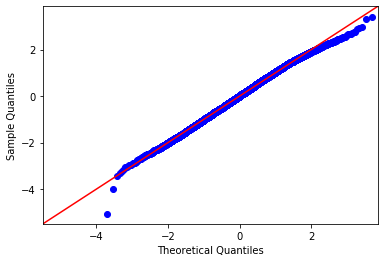

In [69]:
import statsmodels.api as sm
res = y_pred-y_test # residuals
#print(res)
fig=sm.qqplot(res,fit=True, line='45')

In [ ]:
#Evaluate the Random forest regression model

In [70]:
def MAE(prediction,true_values):
    return np.mean(                                                      # Mean
                np.abs(                                                   # Absolute
                        prediction-true_values                            # Error
                    )
                )

In [71]:
def RMSE(prediction,true_values):
    
    return np.sqrt(                                                          # Root
            np.mean(                                                      # Mean
                np.square(                                                # Squared
                         prediction-true_values                           # Error
                )
            )
        )

In [72]:
def MAPE(prediction,true_value):
    return np.mean(                                           # Mean
        np.abs(                                               # Absolute
               (prediction-true_value)/true_value             # Error
            )*100                                            # Percentage
    )

In [144]:
# Calculate MAE, RMSE, MAPE
print('MAE of the model RAZON CUANTI', MAE(y_pred,y_test))
print('RMSE of the model RAZON CUANTI', RMSE(y_pred,y_test))
print('MAPE of the model RAZON CUANTI', MAPE(y_pred,y_test))
print('Accuracy of the model RAZON CUANTI', 100-MAPE(y_pred,y_test))



MAE of the model RAZON CUANTI 23.686978377207975
RMSE of the model RAZON CUANTI 29.30821850198474
MAPE of the model RAZON CUANTI 18.681967709889538
Accuracy of the model RAZON CUANTI 81.31803229011047


In [143]:
# Important variables

feature_list= list(df_t[covariates].columns)
# Get numerical feature importances
importances = list(RandomforestRegModel.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('MOD_RAZONA_CUANTITAT_PUNT\n')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

MOD_RAZONA_CUANTITAT_PUNT

Variable: PERIODO-X            Importance: 0.59
Variable: ESTU_NUCLEO_PREGRADO Importance: 0.1
Variable: ESTU_HORASSEMANATRABAJA Importance: 0.08
Variable: ESTU_GENERO          Importance: 0.06
Variable: FAMI_TIENEINTERNET   Importance: 0.03
Variable: INST_ORIGEN          Importance: 0.02
Variable: FAMI_ESTRATOVIVIENDA Importance: 0.02
Variable: ESTU_METODO_PRGM     Importance: 0.02
Variable: FAMI_TIENECOMPUTADOR Importance: 0.01
Variable: FAMI_EDUCACIONMADRE  Importance: 0.01
Variable: INST_CARACTER_ACADEMICO Importance: 0.01
Variable: ESTU_SIMULACROTIPOICFES Importance: 0.01
Variable: ESTU_VALORMATRICULAUNIVERSIDAD Importance: 0.01
Variable: ESTU_PRGM_DEPARTAMENTO Importance: 0.01
Variable: FAMI_TIENEAUTOMOVIL  Importance: 0.0
Variable: FAMI_TIENELAVADORA   Importance: 0.0
Variable: FAMI_EDUCACIONPADRE  Importance: 0.0
Variable: ESTU_ACTIVIDADREFUERZOGENERIC Importance: 0.0
Variable: ESTU_ACTIVIDADREFUERZOAREAS Importance: 0.0
Variable: ESTU_PAGOMATRICULAPR

**QUANTILES**

In [75]:
df_sabertyt

,Unnamed: 0,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO
937022,140,CC,COLOMBIA,F,22/06/1991,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,...,-A1,17.0,156.0,3,53.0,PUBLICAR,20161,SaberTyT,Normal,Q2
937046,165,CC,COLOMBIA,F,01/07/1992,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,...,A2,85.0,180.0,3,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4
937055,176,CC,COLOMBIA,F,08/10/1992,20161,EK201610085857,ESTUDIANTE,META,50.0,...,A2,76.0,165.0,3,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4
937060,181,CC,COLOMBIA,M,03/05/1994,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,...,A2,80.0,205.5,4,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3
937073,198,CC,COLOMBIA,F,04/02/1996,20161,EK201610096299,ESTUDIANTE,SANTANDER,68.0,...,B1,87.0,172.5,3,78.0,PUBLICAR,20161,SaberTyT,Normal,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502148,76347,CC,COLOMBIA,M,05/28/1996 12:00:00 AM,20195,EK201950042257,ESTUDIANTE,BOYACA,15.0,...,A1,45.0,108.0,1,6.0,PUBLICAR,20192,SaberTyT,Normal,Q3
1502149,76348,CC,COLOMBIA,M,10/04/1998 12:00:00 AM,20195,EK201950042514,ESTUDIANTE,BOYACA,15.0,...,A2,86.0,220.5,4,92.0,PUBLICAR,20192,SaberTyT,Normal,Q3
1502150,76349,CC,COLOMBIA,M,06/19/1999 12:00:00 AM,20195,EK201950044146,ESTUDIANTE,BOYACA,15.0,...,-A1,21.0,205.5,4,90.0,PUBLICAR,20192,SaberTyT,Normal,Q1
1502151,76350,CC,COLOMBIA,M,10/08/1998 12:00:00 AM,20195,EK201950042208,ESTUDIANTE,BOYACA,15.0,...,A2,65.0,151.5,2,40.0,PUBLICAR,20192,SaberTyT,Normal,Q4


In [76]:
df_sabertyt['group_LECTURA'] = pd.cut(df_sabertyt['MOD_LECTURA_CRITICA_PUNT'],
                     bins=[0, np.quantile(df_sabertyt['MOD_LECTURA_CRITICA_PUNT'],0.25 ), np.quantile(df_sabertyt['MOD_LECTURA_CRITICA_PUNT'],0.5 ),\
                           np.quantile(df_sabertyt['MOD_LECTURA_CRITICA_PUNT'],0.75 ), np.quantile(df_sabertyt['MOD_LECTURA_CRITICA_PUNT'],1 )],
                     labels=["Q1", "Q2", "Q3", "Q4"])

<ipython-input-76-3ab50f97c578>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sabertyt['group_LECTURA'] = pd.cut(df_sabertyt['MOD_LECTURA_CRITICA_PUNT'],


In [78]:
df_sabertyt['group_COMPETENCIA'] = pd.cut(df_sabertyt['MOD_COMPETEN_CIUDADA_PUNT'],
                     bins=[0, np.quantile(df_sabertyt['MOD_COMPETEN_CIUDADA_PUNT'],0.25 ), np.quantile(df_sabertyt['MOD_COMPETEN_CIUDADA_PUNT'],0.5 ),\
                           np.quantile(df_sabertyt['MOD_COMPETEN_CIUDADA_PUNT'],0.75 ), np.quantile(df_sabertyt['MOD_COMPETEN_CIUDADA_PUNT'],1 )],
                     labels=["Q1", "Q2", "Q3", "Q4"])

<ipython-input-78-580097de9e69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sabertyt['group_COMPETENCIA'] = pd.cut(df_sabertyt['MOD_COMPETEN_CIUDADA_PUNT'],


In [80]:
df_sabertyt['group_INGLES'] = pd.cut(df_sabertyt['MOD_INGLES_PUNT'],
                     bins=[0, np.quantile(df_sabertyt['MOD_INGLES_PUNT'],0.25 ), np.quantile(df_sabertyt['MOD_INGLES_PUNT'],0.5 ),\
                           np.quantile(df_sabertyt['MOD_INGLES_PUNT'],0.75 ), np.quantile(df_sabertyt['MOD_INGLES_PUNT'],1 )],
                     labels=["Q1", "Q2", "Q3", "Q4"])

<ipython-input-80-5b2e87977d2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sabertyt['group_INGLES'] = pd.cut(df_sabertyt['MOD_INGLES_PUNT'],


In [82]:
df_sabertyt['group_ESCRITA'] = pd.cut(df_sabertyt['MOD_COMUNI_ESCRITA_PUNT'],
                     bins=[0, np.quantile(df_sabertyt['MOD_COMUNI_ESCRITA_PUNT'],0.25 ), np.quantile(df_sabertyt['MOD_COMUNI_ESCRITA_PUNT'],0.5 ),\
                           np.quantile(df_sabertyt['MOD_COMUNI_ESCRITA_PUNT'],0.75 ), np.quantile(df_sabertyt['MOD_COMUNI_ESCRITA_PUNT'],1 )],
                     labels=["Q1", "Q2", "Q3", "Q4"])

<ipython-input-82-30f65de58e8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sabertyt['group_ESCRITA'] = pd.cut(df_sabertyt['MOD_COMUNI_ESCRITA_PUNT'],


In [83]:
df_sabertyt

,Unnamed: 0,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO,group_LECTURA,group_COMPETENCIA,group_INGLES,group_ESCRITA
937022,140,CC,COLOMBIA,F,22/06/1991,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,...,53.0,PUBLICAR,20161,SaberTyT,Normal,Q2,Q2,Q3,Q1,Q3
937046,165,CC,COLOMBIA,F,01/07/1992,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,...,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q4,Q4,Q4,Q4
937055,176,CC,COLOMBIA,F,08/10/1992,20161,EK201610085857,ESTUDIANTE,META,50.0,...,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q2,Q2,Q3,Q3
937060,181,CC,COLOMBIA,M,03/05/1994,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,...,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q4,Q4,Q4,Q4
937073,198,CC,COLOMBIA,F,04/02/1996,20161,EK201610096299,ESTUDIANTE,SANTANDER,68.0,...,78.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q4,Q3,Q4,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502148,76347,CC,COLOMBIA,M,05/28/1996 12:00:00 AM,20195,EK201950042257,ESTUDIANTE,BOYACA,15.0,...,6.0,PUBLICAR,20192,SaberTyT,Normal,Q3,Q2,Q4,Q2,Q1
1502149,76348,CC,COLOMBIA,M,10/04/1998 12:00:00 AM,20195,EK201950042514,ESTUDIANTE,BOYACA,15.0,...,92.0,PUBLICAR,20192,SaberTyT,Normal,Q3,Q2,Q1,Q4,Q4
1502150,76349,CC,COLOMBIA,M,06/19/1999 12:00:00 AM,20195,EK201950044146,ESTUDIANTE,BOYACA,15.0,...,90.0,PUBLICAR,20192,SaberTyT,Normal,Q1,Q2,Q3,Q1,Q4
1502151,76350,CC,COLOMBIA,M,10/08/1998 12:00:00 AM,20195,EK201950042208,ESTUDIANTE,BOYACA,15.0,...,40.0,PUBLICAR,20192,SaberTyT,Normal,Q4,Q4,Q4,Q3,Q2


In [86]:
df_sabertyt["group_LECTURA"] = df_sabertyt["group_LECTURA"].astype('category')
df_sabertyt["group_COMPETENCIA"] = df_sabertyt["group_COMPETENCIA"].astype('category')
df_sabertyt["group_INGLES"] = df_sabertyt["group_INGLES"].astype('category')
df_sabertyt["group_ESCRITA"] = df_sabertyt["group_ESCRITA"].astype('category')

<ipython-input-86-f309d7b3cc30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sabertyt["group_LECTURA"] = df_sabertyt["group_LECTURA"].astype('category')
<ipython-input-86-f309d7b3cc30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sabertyt["group_COMPETENCIA"] = df_sabertyt["group_COMPETENCIA"].astype('category')
<ipython-input-86-f309d7b3cc30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [88]:
df_sabertyt.dtypes

Unnamed: 0                 int64
ESTU_TIPODOCUMENTO        object
ESTU_NACIONALIDAD         object
ESTU_GENERO             category
ESTU_FECHANACIMIENTO      object
                          ...   
group_CUANTITATIVO      category
group_LECTURA           category
group_COMPETENCIA       category
group_INGLES            category
group_ESCRITA           category
Length: 69, dtype: object

In [89]:
df_sabertyt.shape

(39115, 69)

In [90]:
df_sabertyt=df_sabertyt.dropna(subset=['group_LECTURA'])

In [91]:
df_sabertyt.shape

(39113, 69)

In [92]:
df_sabertyt=df_sabertyt.dropna(subset=['group_COMPETENCIA'])

In [93]:
df_sabertyt.shape

(39107, 69)

In [94]:
df_sabertyt=df_sabertyt.dropna(subset=['group_INGLES'])

In [95]:
df_sabertyt.shape

(39067, 69)

In [96]:
df_sabertyt=df_sabertyt.dropna(subset=['group_ESCRITA'])

In [97]:
df_sabertyt.shape

(38781, 69)

**MOD_LECTURA_CRITICA_PUNT**

In [98]:
df_sabertyt.head()

,Unnamed: 0,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,...,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO,group_LECTURA,group_COMPETENCIA,group_INGLES,group_ESCRITA
937022,140,CC,COLOMBIA,F,22/06/1991,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,...,53.0,PUBLICAR,20161,SaberTyT,Normal,Q2,Q2,Q3,Q1,Q3
937046,165,CC,COLOMBIA,F,01/07/1992,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,...,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q4,Q4,Q4,Q4
937055,176,CC,COLOMBIA,F,08/10/1992,20161,EK201610085857,ESTUDIANTE,META,50.0,...,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q2,Q2,Q3,Q3
937060,181,CC,COLOMBIA,M,03/05/1994,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,...,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q4,Q4,Q4,Q4
937073,198,CC,COLOMBIA,F,04/02/1996,20161,EK201610096299,ESTUDIANTE,SANTANDER,68.0,...,78.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q4,Q3,Q4,Q4


In [99]:
df_t_lectura=df_sabertyt.copy()
for var in ['ESTU_GENERO','INST_ORIGEN','FAMI_TIENEAUTOMOVIL','FAMI_TIENELAVADORA','FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET','FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONMADRE',\
            'FAMI_EDUCACIONPADRE','ESTU_METODO_PRGM','INST_CARACTER_ACADEMICO','ESTU_HORASSEMANATRABAJA','ESTU_ACTIVIDADREFUERZOGENERIC','ESTU_ACTIVIDADREFUERZOAREAS',\
            'ESTU_SIMULACROTIPOICFES','ESTU_PAGOMATRICULAPROPIO','ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULABECA','ESTU_VALORMATRICULAUNIVERSIDAD',\
            'ESTU_PRGM_DEPARTAMENTO','ESTU_NUCLEO_PREGRADO']:
    df_t_lectura[var]=df_t_lectura[var].cat.codes

In [102]:
with pd.option_context('display.max_columns',500):
    display(df_t_lectura.head())

,Unnamed: 0,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_COLE_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_SIMULACROTIPOICFES,ESTU_ACTIVIDADREFUERZOAREAS,ESTU_ACTIVIDADREFUERZOGENERIC,ESTU_TIPODOCUMENTOSB11,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO,group_LECTURA,group_COMPETENCIA,group_INGLES,group_ESCRITA
937022,140,CC,COLOMBIA,0,22/06/1991,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,CALI,76001.0,COLEGIO REPUBLICA DOMINICANA (IED) - SEDE PRIN...,8,0,0,0,1,0,0,0,CC,8,5,3,0,1,1,0,1,4109,INSTITUTO TECNICO NACIONAL DE COMERCIOSIMON RO...,TECNICA PROFESIONAL EN SALUD OCUPACIONAL,76001,CALI,29,TÉCNICO PROFESIONAL,2,46,76001.0,CALI,VALLE,3,4,76001,CALI,VALLE,76,136.5,34.0,145.5,45.0,148.5,47.0,120.0,-A1,17.0,156.0,3,53.0,PUBLICAR,20161,SaberTyT,Normal,Q2,Q2,Q3,Q1,Q3
937046,165,CC,COLOMBIA,0,01/07/1992,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,BOGOTA,11001.0,I.E.D. ESCUELA NORMAL SUPERIOR MARIA AUXILIADORA,1,0,1,0,1,0,0,0,TI,8,5,2,1,1,1,0,1,4813,CORPORACION UNIFICADA NACIONAL DE EDUCACION SU...,TECNICA PROFESIONAL EN MANTENIMIENTO ELECTRONICO,11001,"BOGOTÁ, D.C.",3,TÉCNICO PROFESIONAL,2,30,11001.0,"BOGOTÁ, D.C.",BOGOTÁ,3,0,11001,BOGOTÁ,BOGOTÁ,11,192.0,92.0,187.5,89.0,199.5,96.0,181.5,A2,85.0,180.0,3,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q4,Q4,Q4,Q4
937055,176,CC,COLOMBIA,0,08/10/1992,20161,EK201610085857,ESTUDIANTE,META,50.0,VILLAVICENCIO,50001.0,COLEGIO CORAZONISTA,1,0,1,0,1,0,0,0,TI,5,1,4,1,1,1,1,1,3712,FUNDACION CENTRO DE INVESTIGACION DOCENCIA Y C...,TECNOLOGIA EN INDUSTRIAL,50001,VILLAVICENCIO,19,TECNOLOGÍA,2,32,11001.0,"BOGOTÁ, D.C.",BOGOTÁ,1,1,50001,VILLAVICENCIO,META,50,166.5,70.0,132.0,28.0,142.5,39.0,169.5,A2,76.0,165.0,3,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q2,Q2,Q3,Q3
937060,181,CC,COLOMBIA,1,03/05/1994,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,BARRANQUILLA,8001.0,PABLO VI,8,0,1,0,1,0,0,0,TI,8,7,2,0,1,1,0,1,3117,INSTITUCION UNIVERSITARIA ITSA-SOLEDAD,TECNOLOGIA EN AUTOMATIZACIÓN ELECTRÓNICA INDUS...,8758,SOLEDAD,2,TECNOLOGÍA,2,30,8758.0,SOLEDAD,ATLANTICO,2,4,8001,BARRANQUILLA,ATLANTICO,8,154.5,55.0,205.5,97.0,207.0,98.0,174.0,A2,80.0,205.5,4,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q4,Q4,Q4,Q4
937073,198,CC,COLOMBIA,0,04/02/1996,20161,EK201610096299,ESTUDIANTE,SANTANDER,68.0,BUCARAMANGA,68001.0,I.E.R PEDRONEL DURANGO,1,0,1,0,1,0,0,0,TI,8,8,2,1,0,1,0,1,3201,UNIDADES TECNOLOGICAS DE SANTANDER-BUCARAMANGA,TECNOLOGIA EN CONTABILIDAD FINANCIERA,68001,BUCARAMANGA,26,TECNOLOGÍA,2,0,68001.0,BUCARAMANGA,SANTANDER,1,2,68001,BUCARAMANGA,SANTANDER,68,174.0,78.0,178.5,83.0,160.5,62.0,186.0,B1,87.0,172.5,3,78.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q4,Q3,Q4,Q4


In [105]:
X_train_lect, X_test_lect, y_train_lect, y_test_lect = train_test_split(df_t_lectura[covariates],
                                                    df_t_lectura['MOD_LECTURA_CRITICA_PUNT'], test_size=0.25,
                                                    random_state=1234)

In [106]:
print('X_train_lect shape: ', X_train_lect.shape)
print('X_test_lect shape: ', X_test_lect.shape)
print('y_train_lect shape: ', y_train_lect.shape)
print('y_test_lect shape: ', y_test_lect.shape)

X_train_lect shape:  (29085, 23)
X_test_lect shape:  (9696, 23)
y_train_lect shape:  (29085,)
y_test_lect shape:  (9696,)


In [109]:
# Create the Regression model with Random Forest
RandomforestRegModel_lectura= RandomForestRegressor(bootstrap=True, criterion='mse',max_depth=6,max_features='auto')
# Train the model
RandomforestRegModel_lectura.fit(X_train_lect, y_train_lect)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [114]:
y_pred_lect=RandomforestRegModel_lectura.predict(X_test_lect)

In [115]:
#MOD_LECTURA_CRITICA_PUNT
comparar_lect=pd.DataFrame(y_pred_lect, y_test_lect)
comparar_lect.head(20)

,0
MOD_LECTURA_CRITICA_PUNT,
99.0,148.256917
165.0,150.203293
163.5,125.966813
123.0,150.504385
169.5,149.851648
148.5,144.548199
177.0,144.836848
130.5,138.253333
144.0,134.595391


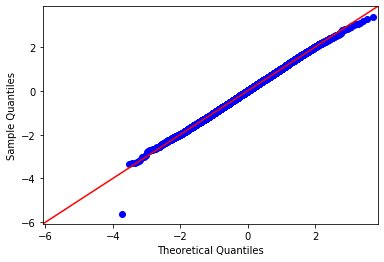

In [116]:
res_lect = y_pred_lect-y_test_lect # residuals
#print(res)
fig=sm.qqplot(res_lect,fit=True, line='45')

In [142]:
# Calculate MAE, RMSE, MAPE
print('MAE of the model LECTURA', MAE(y_pred_lect,y_test_lect))
print('RMSE of the model LECTURA', RMSE(y_pred_lect,y_test_lect))
print('MAPE of the model LECTURA', MAPE(y_pred_lect,y_test_lect))
print('Accuracy of the model LECTURA', 100-MAPE(y_pred_lect,y_test_lect))



MAE of the model LECTURA 24.315253435597217
RMSE of the model LECTURA 30.316667875816307
MAPE of the model LECTURA 18.342029437789783
Accuracy of the model LECTURA 81.65797056221021


In [141]:
# Important variables

feature_list_lectura= list(df_t_lectura[covariates].columns)
# Get numerical feature importances
importances_lectura = list(RandomforestRegModel_lectura.feature_importances_)
# List of tuples with variable and importance
feature_importances_lectura = [(feature, round(importance, 2)) for feature, importance in zip(feature_list_lectura, importances_lectura)]
# Sort the feature importances by most important first
feature_importances_lectura = sorted(feature_importances_lectura, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('MOD_LECTURA_CRITICA_PUNT\n')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_lectura];

MOD_LECTURA_CRITICA_PUNT

Variable: INST_ORIGEN          Importance: 0.18
Variable: PERIODO-X            Importance: 0.17
Variable: FAMI_ESTRATOVIVIENDA Importance: 0.16
Variable: FAMI_TIENEINTERNET   Importance: 0.12
Variable: ESTU_VALORMATRICULAUNIVERSIDAD Importance: 0.08
Variable: ESTU_PRGM_DEPARTAMENTO Importance: 0.05
Variable: ESTU_NUCLEO_PREGRADO Importance: 0.05
Variable: INST_CARACTER_ACADEMICO Importance: 0.03
Variable: ESTU_HORASSEMANATRABAJA Importance: 0.03
Variable: FAMI_TIENECOMPUTADOR Importance: 0.02
Variable: FAMI_EDUCACIONMADRE  Importance: 0.02
Variable: FAMI_EDUCACIONPADRE  Importance: 0.02
Variable: ESTU_METODO_PRGM     Importance: 0.02
Variable: ESTU_GENERO          Importance: 0.01
Variable: ESTU_SIMULACROTIPOICFES Importance: 0.01
Variable: FAMI_TIENEAUTOMOVIL  Importance: 0.0
Variable: FAMI_TIENELAVADORA   Importance: 0.0
Variable: ESTU_ACTIVIDADREFUERZOGENERIC Importance: 0.0
Variable: ESTU_ACTIVIDADREFUERZOAREAS Importance: 0.0
Variable: ESTU_PAGOMATRICULAP

**MOD_COMPETEN_CIUDADA_PUNT**

In [119]:
df_t_competencia=df_sabertyt.copy()
for var in ['ESTU_GENERO','INST_ORIGEN','FAMI_TIENEAUTOMOVIL','FAMI_TIENELAVADORA','FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET','FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONMADRE',\
            'FAMI_EDUCACIONPADRE','ESTU_METODO_PRGM','INST_CARACTER_ACADEMICO','ESTU_HORASSEMANATRABAJA','ESTU_ACTIVIDADREFUERZOGENERIC','ESTU_ACTIVIDADREFUERZOAREAS',\
            'ESTU_SIMULACROTIPOICFES','ESTU_PAGOMATRICULAPROPIO','ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULABECA','ESTU_VALORMATRICULAUNIVERSIDAD',\
            'ESTU_PRGM_DEPARTAMENTO','ESTU_NUCLEO_PREGRADO']:
    df_t_competencia[var]=df_t_competencia[var].cat.codes


In [120]:
with pd.option_context('display.max_columns',500):
    display(df_t_competencia.head())

,Unnamed: 0,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_COLE_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_SIMULACROTIPOICFES,ESTU_ACTIVIDADREFUERZOAREAS,ESTU_ACTIVIDADREFUERZOGENERIC,ESTU_TIPODOCUMENTOSB11,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO,group_LECTURA,group_COMPETENCIA,group_INGLES,group_ESCRITA
937022,140,CC,COLOMBIA,0,22/06/1991,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,CALI,76001.0,COLEGIO REPUBLICA DOMINICANA (IED) - SEDE PRIN...,8,0,0,0,1,0,0,0,CC,8,5,3,0,1,1,0,1,4109,INSTITUTO TECNICO NACIONAL DE COMERCIOSIMON RO...,TECNICA PROFESIONAL EN SALUD OCUPACIONAL,76001,CALI,29,TÉCNICO PROFESIONAL,2,46,76001.0,CALI,VALLE,3,4,76001,CALI,VALLE,76,136.5,34.0,145.5,45.0,148.5,47.0,120.0,-A1,17.0,156.0,3,53.0,PUBLICAR,20161,SaberTyT,Normal,Q2,Q2,Q3,Q1,Q3
937046,165,CC,COLOMBIA,0,01/07/1992,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,BOGOTA,11001.0,I.E.D. ESCUELA NORMAL SUPERIOR MARIA AUXILIADORA,1,0,1,0,1,0,0,0,TI,8,5,2,1,1,1,0,1,4813,CORPORACION UNIFICADA NACIONAL DE EDUCACION SU...,TECNICA PROFESIONAL EN MANTENIMIENTO ELECTRONICO,11001,"BOGOTÁ, D.C.",3,TÉCNICO PROFESIONAL,2,30,11001.0,"BOGOTÁ, D.C.",BOGOTÁ,3,0,11001,BOGOTÁ,BOGOTÁ,11,192.0,92.0,187.5,89.0,199.5,96.0,181.5,A2,85.0,180.0,3,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q4,Q4,Q4,Q4
937055,176,CC,COLOMBIA,0,08/10/1992,20161,EK201610085857,ESTUDIANTE,META,50.0,VILLAVICENCIO,50001.0,COLEGIO CORAZONISTA,1,0,1,0,1,0,0,0,TI,5,1,4,1,1,1,1,1,3712,FUNDACION CENTRO DE INVESTIGACION DOCENCIA Y C...,TECNOLOGIA EN INDUSTRIAL,50001,VILLAVICENCIO,19,TECNOLOGÍA,2,32,11001.0,"BOGOTÁ, D.C.",BOGOTÁ,1,1,50001,VILLAVICENCIO,META,50,166.5,70.0,132.0,28.0,142.5,39.0,169.5,A2,76.0,165.0,3,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q2,Q2,Q3,Q3
937060,181,CC,COLOMBIA,1,03/05/1994,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,BARRANQUILLA,8001.0,PABLO VI,8,0,1,0,1,0,0,0,TI,8,7,2,0,1,1,0,1,3117,INSTITUCION UNIVERSITARIA ITSA-SOLEDAD,TECNOLOGIA EN AUTOMATIZACIÓN ELECTRÓNICA INDUS...,8758,SOLEDAD,2,TECNOLOGÍA,2,30,8758.0,SOLEDAD,ATLANTICO,2,4,8001,BARRANQUILLA,ATLANTICO,8,154.5,55.0,205.5,97.0,207.0,98.0,174.0,A2,80.0,205.5,4,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q4,Q4,Q4,Q4
937073,198,CC,COLOMBIA,0,04/02/1996,20161,EK201610096299,ESTUDIANTE,SANTANDER,68.0,BUCARAMANGA,68001.0,I.E.R PEDRONEL DURANGO,1,0,1,0,1,0,0,0,TI,8,8,2,1,0,1,0,1,3201,UNIDADES TECNOLOGICAS DE SANTANDER-BUCARAMANGA,TECNOLOGIA EN CONTABILIDAD FINANCIERA,68001,BUCARAMANGA,26,TECNOLOGÍA,2,0,68001.0,BUCARAMANGA,SANTANDER,1,2,68001,BUCARAMANGA,SANTANDER,68,174.0,78.0,178.5,83.0,160.5,62.0,186.0,B1,87.0,172.5,3,78.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q4,Q3,Q4,Q4


In [121]:
X_train_compet, X_test_compet, y_train_compet, y_test_compet = train_test_split(df_t_competencia[covariates],
                                                    df_t_competencia['MOD_COMPETEN_CIUDADA_PUNT'], test_size=0.25,
                                                    random_state=1234)

In [122]:
print('X_train_compet shape: ', X_train_compet.shape)
print('X_test_compet shape: ', X_test_compet.shape)
print('y_train_compet shape: ', y_train_compet.shape)
print('y_test_compet shape: ', y_test_compet.shape)

X_train_compet shape:  (29085, 23)
X_test_compet shape:  (9696, 23)
y_train_compet shape:  (29085,)
y_test_compet shape:  (9696,)


In [123]:
# Create the Regression model with Random Forest
RandomforestRegModel_competencia= RandomForestRegressor(bootstrap=True, criterion='mse',max_depth=6,max_features='auto')
# Train the model
RandomforestRegModel_competencia.fit(X_train_compet, y_train_compet)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [124]:
y_pred_compet=RandomforestRegModel_competencia.predict(X_test_compet)

In [125]:
#MOD_COMPETEN_CIUDADA_PUNT
comparar_compet=pd.DataFrame(y_pred_compet, y_test_compet)
comparar_compet.head(20)

,0
MOD_COMPETEN_CIUDADA_PUNT,
117.0,140.094712
132.0,150.394922
132.0,123.786800
112.5,141.693540
168.0,140.296522
162.0,136.962654
180.0,134.612014
120.0,131.531234
130.5,141.708004


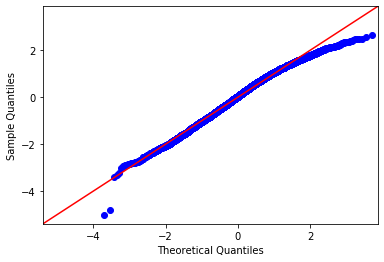

In [126]:
res_compet = y_pred_compet-y_test_compet # residuals
#print(res)
fig=sm.qqplot(res_compet,fit=True, line='45')

In [127]:
# Calculate MAE, RMSE, MAPE
print('MAE of the model COMPETENCIA', MAE(y_pred_compet,y_test_compet))
print('RMSE of the model COMNPETENCIA', RMSE(y_pred_compet,y_test_compet))
print('MAPE of the model COMPETENCIA', MAPE(y_pred_compet,y_test_compet))
print('Accuracy of the model COMPETENCIA', 100-MAPE(y_pred_compet,y_test_compet))

MAE of the model COMPETENCIA 26.639563838555457
RMSE of the model COMNPETENCIA 32.47215109800726
MAPE of the model COMPETENCIA 20.286474386929235
Accuracy of the model COMPETENCIA 79.71352561307077


In [130]:
# Important variables COMPETENCIA

feature_list_competencia= list(df_t_competencia[covariates].columns)
# Get numerical feature importances
importances_competencia = list(RandomforestRegModel_competencia.feature_importances_)
# List of tuples with variable and importance
feature_importances_competencia = [(feature, round(importance, 2)) for feature, importance in zip(feature_list_competencia, importances_competencia)]
# Sort the feature importances by most important first
feature_importances_competencia = sorted(feature_importances_competencia, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('MOD_COMPETEN_CIUDADA_PUNT\n')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_competencia];

MOD_COMPETEN_CIUDADA_PUNT

Variable: PERIODO-X            Importance: 0.44
Variable: FAMI_ESTRATOVIVIENDA Importance: 0.14
Variable: ESTU_PRGM_DEPARTAMENTO Importance: 0.07
Variable: FAMI_TIENECOMPUTADOR Importance: 0.06
Variable: ESTU_HORASSEMANATRABAJA Importance: 0.05
Variable: INST_CARACTER_ACADEMICO Importance: 0.04
Variable: ESTU_NUCLEO_PREGRADO Importance: 0.04
Variable: INST_ORIGEN          Importance: 0.03
Variable: FAMI_TIENEINTERNET   Importance: 0.03
Variable: ESTU_GENERO          Importance: 0.02
Variable: FAMI_EDUCACIONMADRE  Importance: 0.02
Variable: ESTU_VALORMATRICULAUNIVERSIDAD Importance: 0.02
Variable: FAMI_EDUCACIONPADRE  Importance: 0.01
Variable: ESTU_ACTIVIDADREFUERZOAREAS Importance: 0.01
Variable: ESTU_SIMULACROTIPOICFES Importance: 0.01
Variable: FAMI_TIENEAUTOMOVIL  Importance: 0.0
Variable: FAMI_TIENELAVADORA   Importance: 0.0
Variable: ESTU_METODO_PRGM     Importance: 0.0
Variable: ESTU_ACTIVIDADREFUERZOGENERIC Importance: 0.0
Variable: ESTU_PAGOMATRICULA

**MOD_INGLES_PUNT**

In [131]:
df_t_ingles=df_sabertyt.copy()
for var in ['ESTU_GENERO','INST_ORIGEN','FAMI_TIENEAUTOMOVIL','FAMI_TIENELAVADORA','FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET','FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONMADRE',\
            'FAMI_EDUCACIONPADRE','ESTU_METODO_PRGM','INST_CARACTER_ACADEMICO','ESTU_HORASSEMANATRABAJA','ESTU_ACTIVIDADREFUERZOGENERIC','ESTU_ACTIVIDADREFUERZOAREAS',\
            'ESTU_SIMULACROTIPOICFES','ESTU_PAGOMATRICULAPROPIO','ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULABECA','ESTU_VALORMATRICULAUNIVERSIDAD',\
            'ESTU_PRGM_DEPARTAMENTO','ESTU_NUCLEO_PREGRADO']:
    df_t_ingles[var]=df_t_ingles[var].cat.codes

In [132]:
with pd.option_context('display.max_columns',500):
    display(df_t_ingles.head())

,Unnamed: 0,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_COLE_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_SIMULACROTIPOICFES,ESTU_ACTIVIDADREFUERZOAREAS,ESTU_ACTIVIDADREFUERZOGENERIC,ESTU_TIPODOCUMENTOSB11,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO,group_LECTURA,group_COMPETENCIA,group_INGLES,group_ESCRITA
937022,140,CC,COLOMBIA,0,22/06/1991,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,CALI,76001.0,COLEGIO REPUBLICA DOMINICANA (IED) - SEDE PRIN...,8,0,0,0,1,0,0,0,CC,8,5,3,0,1,1,0,1,4109,INSTITUTO TECNICO NACIONAL DE COMERCIOSIMON RO...,TECNICA PROFESIONAL EN SALUD OCUPACIONAL,76001,CALI,29,TÉCNICO PROFESIONAL,2,46,76001.0,CALI,VALLE,3,4,76001,CALI,VALLE,76,136.5,34.0,145.5,45.0,148.5,47.0,120.0,-A1,17.0,156.0,3,53.0,PUBLICAR,20161,SaberTyT,Normal,Q2,Q2,Q3,Q1,Q3
937046,165,CC,COLOMBIA,0,01/07/1992,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,BOGOTA,11001.0,I.E.D. ESCUELA NORMAL SUPERIOR MARIA AUXILIADORA,1,0,1,0,1,0,0,0,TI,8,5,2,1,1,1,0,1,4813,CORPORACION UNIFICADA NACIONAL DE EDUCACION SU...,TECNICA PROFESIONAL EN MANTENIMIENTO ELECTRONICO,11001,"BOGOTÁ, D.C.",3,TÉCNICO PROFESIONAL,2,30,11001.0,"BOGOTÁ, D.C.",BOGOTÁ,3,0,11001,BOGOTÁ,BOGOTÁ,11,192.0,92.0,187.5,89.0,199.5,96.0,181.5,A2,85.0,180.0,3,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q4,Q4,Q4,Q4
937055,176,CC,COLOMBIA,0,08/10/1992,20161,EK201610085857,ESTUDIANTE,META,50.0,VILLAVICENCIO,50001.0,COLEGIO CORAZONISTA,1,0,1,0,1,0,0,0,TI,5,1,4,1,1,1,1,1,3712,FUNDACION CENTRO DE INVESTIGACION DOCENCIA Y C...,TECNOLOGIA EN INDUSTRIAL,50001,VILLAVICENCIO,19,TECNOLOGÍA,2,32,11001.0,"BOGOTÁ, D.C.",BOGOTÁ,1,1,50001,VILLAVICENCIO,META,50,166.5,70.0,132.0,28.0,142.5,39.0,169.5,A2,76.0,165.0,3,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q2,Q2,Q3,Q3
937060,181,CC,COLOMBIA,1,03/05/1994,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,BARRANQUILLA,8001.0,PABLO VI,8,0,1,0,1,0,0,0,TI,8,7,2,0,1,1,0,1,3117,INSTITUCION UNIVERSITARIA ITSA-SOLEDAD,TECNOLOGIA EN AUTOMATIZACIÓN ELECTRÓNICA INDUS...,8758,SOLEDAD,2,TECNOLOGÍA,2,30,8758.0,SOLEDAD,ATLANTICO,2,4,8001,BARRANQUILLA,ATLANTICO,8,154.5,55.0,205.5,97.0,207.0,98.0,174.0,A2,80.0,205.5,4,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q4,Q4,Q4,Q4
937073,198,CC,COLOMBIA,0,04/02/1996,20161,EK201610096299,ESTUDIANTE,SANTANDER,68.0,BUCARAMANGA,68001.0,I.E.R PEDRONEL DURANGO,1,0,1,0,1,0,0,0,TI,8,8,2,1,0,1,0,1,3201,UNIDADES TECNOLOGICAS DE SANTANDER-BUCARAMANGA,TECNOLOGIA EN CONTABILIDAD FINANCIERA,68001,BUCARAMANGA,26,TECNOLOGÍA,2,0,68001.0,BUCARAMANGA,SANTANDER,1,2,68001,BUCARAMANGA,SANTANDER,68,174.0,78.0,178.5,83.0,160.5,62.0,186.0,B1,87.0,172.5,3,78.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q4,Q3,Q4,Q4


In [133]:
X_train_ingles, X_test_ingles, y_train_ingles, y_test_ingles = train_test_split(df_t_ingles[covariates],
                                                    df_t_ingles['MOD_INGLES_PUNT'], test_size=0.25,
                                                    random_state=1234)

In [134]:
print('X_train_ingles shape: ', X_train_ingles.shape)
print('X_test_ingles shape: ', X_test_ingles.shape)
print('y_train_ingles shape: ', y_train_ingles.shape)
print('y_test_ingles shape: ', y_test_ingles.shape)

X_train_ingles shape:  (29085, 23)
X_test_ingles shape:  (9696, 23)
y_train_ingles shape:  (29085,)
y_test_ingles shape:  (9696,)


In [135]:
# Create the Regression model with Random Forest
RandomforestRegModel_ingles= RandomForestRegressor(bootstrap=True, criterion='mse',max_depth=6,max_features='auto')
# Train the model
RandomforestRegModel_ingles.fit(X_train_ingles, y_train_ingles)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [136]:
y_pred_ingles=RandomforestRegModel_ingles.predict(X_test_ingles)

In [137]:
#MOD_INGLES_PUNT
comparar_ingles=pd.DataFrame(y_pred_ingles, y_test_ingles)
comparar_ingles.head(20)

,0
MOD_INGLES_PUNT,
136.5,151.873371
198.0,154.931686
130.5,129.709398
105.0,158.922201
99.0,157.162038
133.5,156.758747
151.5,152.081092
153.0,138.661278
160.5,138.003310


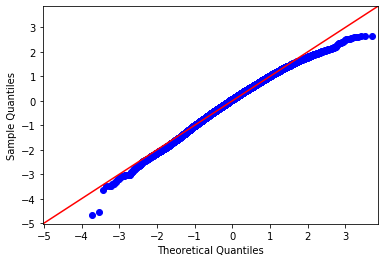

In [138]:
res_ingles = y_pred_ingles-y_test_ingles # residuals
#print(res)
fig=sm.qqplot(res_ingles,fit=True, line='45')

In [139]:
# Calculate MAE, RMSE, MAPE
print('MAE of the model INGLES', MAE(y_pred_ingles,y_test_ingles))
print('RMSE of the model INGLES', RMSE(y_pred_ingles,y_test_ingles))
print('MAPE of the model INGLES', MAPE(y_pred_ingles,y_test_ingles))
print('Accuracy of the model INGLES', 100-MAPE(y_pred_ingles,y_test_ingles))

MAE of the model INGLES 23.758370961577103
RMSE of the model INGLES 29.56986671898576
MAPE of the model INGLES 16.550319239610577
Accuracy of the model INGLES 83.44968076038943


In [140]:
# Important variables INGLES

feature_list_ingles= list(df_t_ingles[covariates].columns)
# Get numerical feature importances
importances_ingles = list(RandomforestRegModel_ingles.feature_importances_)
# List of tuples with variable and importance
feature_importances_ingles = [(feature, round(importance, 2)) for feature, importance in zip(feature_list_ingles, importances_ingles)]
# Sort the feature importances by most important first
feature_importances_ingles = sorted(feature_importances_ingles, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('MOD_INGLES_PUNT\n')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_ingles];

MOD_INGLES_PUNT

Variable: FAMI_TIENEINTERNET   Importance: 0.24
Variable: FAMI_ESTRATOVIVIENDA Importance: 0.21
Variable: INST_ORIGEN          Importance: 0.15
Variable: FAMI_EDUCACIONMADRE  Importance: 0.11
Variable: ESTU_METODO_PRGM     Importance: 0.08
Variable: ESTU_NUCLEO_PREGRADO Importance: 0.06
Variable: FAMI_EDUCACIONPADRE  Importance: 0.04
Variable: ESTU_VALORMATRICULAUNIVERSIDAD Importance: 0.03
Variable: INST_CARACTER_ACADEMICO Importance: 0.02
Variable: ESTU_PRGM_DEPARTAMENTO Importance: 0.02
Variable: FAMI_TIENECOMPUTADOR Importance: 0.01
Variable: ESTU_HORASSEMANATRABAJA Importance: 0.01
Variable: ESTU_PAGOMATRICULAPADRES Importance: 0.01
Variable: PERIODO-X            Importance: 0.01
Variable: ESTU_GENERO          Importance: 0.0
Variable: FAMI_TIENEAUTOMOVIL  Importance: 0.0
Variable: FAMI_TIENELAVADORA   Importance: 0.0
Variable: ESTU_ACTIVIDADREFUERZOGENERIC Importance: 0.0
Variable: ESTU_ACTIVIDADREFUERZOAREAS Importance: 0.0
Variable: ESTU_SIMULACROTIPOICFES Impo

**MOD_COMUNI_ESCRITA_PUNT**

In [146]:
df_t_escrita=df_sabertyt.copy()
for var in ['ESTU_GENERO','INST_ORIGEN','FAMI_TIENEAUTOMOVIL','FAMI_TIENELAVADORA','FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET','FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONMADRE',\
            'FAMI_EDUCACIONPADRE','ESTU_METODO_PRGM','INST_CARACTER_ACADEMICO','ESTU_HORASSEMANATRABAJA','ESTU_ACTIVIDADREFUERZOGENERIC','ESTU_ACTIVIDADREFUERZOAREAS',\
            'ESTU_SIMULACROTIPOICFES','ESTU_PAGOMATRICULAPROPIO','ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULABECA','ESTU_VALORMATRICULAUNIVERSIDAD',\
            'ESTU_PRGM_DEPARTAMENTO','ESTU_NUCLEO_PREGRADO']:
    df_t_escrita[var]=df_t_escrita[var].cat.codes

In [147]:
with pd.option_context('display.max_columns',500):
    display(df_t_escrita.head())

,Unnamed: 0,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_COLE_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_SIMULACROTIPOICFES,ESTU_ACTIVIDADREFUERZOAREAS,ESTU_ACTIVIDADREFUERZOGENERIC,ESTU_TIPODOCUMENTOSB11,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO,group_LECTURA,group_COMPETENCIA,group_INGLES,group_ESCRITA
937022,140,CC,COLOMBIA,0,22/06/1991,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,CALI,76001.0,COLEGIO REPUBLICA DOMINICANA (IED) - SEDE PRIN...,8,0,0,0,1,0,0,0,CC,8,5,3,0,1,1,0,1,4109,INSTITUTO TECNICO NACIONAL DE COMERCIOSIMON RO...,TECNICA PROFESIONAL EN SALUD OCUPACIONAL,76001,CALI,29,TÉCNICO PROFESIONAL,2,46,76001.0,CALI,VALLE,3,4,76001,CALI,VALLE,76,136.5,34.0,145.5,45.0,148.5,47.0,120.0,-A1,17.0,156.0,3,53.0,PUBLICAR,20161,SaberTyT,Normal,Q2,Q2,Q3,Q1,Q3
937046,165,CC,COLOMBIA,0,01/07/1992,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,BOGOTA,11001.0,I.E.D. ESCUELA NORMAL SUPERIOR MARIA AUXILIADORA,1,0,1,0,1,0,0,0,TI,8,5,2,1,1,1,0,1,4813,CORPORACION UNIFICADA NACIONAL DE EDUCACION SU...,TECNICA PROFESIONAL EN MANTENIMIENTO ELECTRONICO,11001,"BOGOTÁ, D.C.",3,TÉCNICO PROFESIONAL,2,30,11001.0,"BOGOTÁ, D.C.",BOGOTÁ,3,0,11001,BOGOTÁ,BOGOTÁ,11,192.0,92.0,187.5,89.0,199.5,96.0,181.5,A2,85.0,180.0,3,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q4,Q4,Q4,Q4
937055,176,CC,COLOMBIA,0,08/10/1992,20161,EK201610085857,ESTUDIANTE,META,50.0,VILLAVICENCIO,50001.0,COLEGIO CORAZONISTA,1,0,1,0,1,0,0,0,TI,5,1,4,1,1,1,1,1,3712,FUNDACION CENTRO DE INVESTIGACION DOCENCIA Y C...,TECNOLOGIA EN INDUSTRIAL,50001,VILLAVICENCIO,19,TECNOLOGÍA,2,32,11001.0,"BOGOTÁ, D.C.",BOGOTÁ,1,1,50001,VILLAVICENCIO,META,50,166.5,70.0,132.0,28.0,142.5,39.0,169.5,A2,76.0,165.0,3,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q2,Q2,Q3,Q3
937060,181,CC,COLOMBIA,1,03/05/1994,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,BARRANQUILLA,8001.0,PABLO VI,8,0,1,0,1,0,0,0,TI,8,7,2,0,1,1,0,1,3117,INSTITUCION UNIVERSITARIA ITSA-SOLEDAD,TECNOLOGIA EN AUTOMATIZACIÓN ELECTRÓNICA INDUS...,8758,SOLEDAD,2,TECNOLOGÍA,2,30,8758.0,SOLEDAD,ATLANTICO,2,4,8001,BARRANQUILLA,ATLANTICO,8,154.5,55.0,205.5,97.0,207.0,98.0,174.0,A2,80.0,205.5,4,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q4,Q4,Q4,Q4
937073,198,CC,COLOMBIA,0,04/02/1996,20161,EK201610096299,ESTUDIANTE,SANTANDER,68.0,BUCARAMANGA,68001.0,I.E.R PEDRONEL DURANGO,1,0,1,0,1,0,0,0,TI,8,8,2,1,0,1,0,1,3201,UNIDADES TECNOLOGICAS DE SANTANDER-BUCARAMANGA,TECNOLOGIA EN CONTABILIDAD FINANCIERA,68001,BUCARAMANGA,26,TECNOLOGÍA,2,0,68001.0,BUCARAMANGA,SANTANDER,1,2,68001,BUCARAMANGA,SANTANDER,68,174.0,78.0,178.5,83.0,160.5,62.0,186.0,B1,87.0,172.5,3,78.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q4,Q3,Q4,Q4


In [149]:
X_train_escrita, X_test_escrita, y_train_escrita, y_test_escrita = train_test_split(df_t_escrita[covariates],
                                                    df_t_escrita['MOD_COMUNI_ESCRITA_PUNT'], test_size=0.25,
                                                    random_state=1234)

In [150]:
print('X_train_escrita shape: ', X_train_escrita.shape)
print('X_test_escrita shape: ', X_test_escrita.shape)
print('y_train_escrita shape: ', y_train_escrita.shape)
print('y_test_escrita shape: ', y_test_escrita.shape)

X_train_escrita shape:  (29085, 23)
X_test_escrita shape:  (9696, 23)
y_train_escrita shape:  (29085,)
y_test_escrita shape:  (9696,)


In [151]:
# Create the Regression model with Random Forest
RandomforestRegModel_escrita= RandomForestRegressor(bootstrap=True, criterion='mse',max_depth=6,max_features='auto')
# Train the model
RandomforestRegModel_escrita.fit(X_train_escrita, y_train_escrita)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [152]:
y_pred_escrita=RandomforestRegModel_escrita.predict(X_test_escrita)

In [154]:
y_pred_escrita

array([143.95958079, 154.28851105, 153.05239345, ..., 156.14548505,
       145.52139199, 162.08473744])

In [153]:
#MOD_COMUNI_ESCRITA_PUNT
comparar_escrita=pd.DataFrame(y_pred_escrita, y_test_escrita)
comparar_escrita.head(20)

,0
MOD_COMUNI_ESCRITA_PUNT,
153.0,143.959581
159.0,154.288511
150.0,153.052393
151.5,155.492589
157.5,155.004357
133.5,153.686937
160.5,155.257478
154.5,145.623979
108.0,145.268875


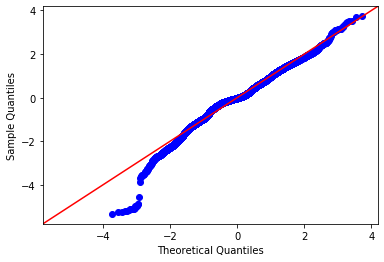

In [155]:
res_escrita = y_pred_escrita-y_test_escrita # residuals
#print(res)
fig=sm.qqplot(res_escrita,fit=True, line='45')

In [156]:
# Calculate MAE, RMSE, MAPE
print('MAE of the model escrita', MAE(y_pred_escrita,y_test_escrita))
print('RMSE of the model escrita', RMSE(y_pred_escrita,y_test_escrita))
print('MAPE of the model escrita', MAPE(y_pred_escrita,y_test_escrita))
print('Accuracy of the model escrita', 100-MAPE(y_pred_escrita,y_test_escrita))

MAE of the model escrita 21.505236680214228
RMSE of the model escrita 29.25996739133666
MAPE of the model escrita 15.200566194408745
Accuracy of the model escrita 84.79943380559125


In [157]:
# Important variables MOD_COMUNI_ESCRITA_PUNT

feature_list_escrita= list(df_t_escrita[covariates].columns)
# Get numerical feature importances
importances_escrita = list(RandomforestRegModel_escrita.feature_importances_)
# List of tuples with variable and importance
feature_importances_escrita = [(feature, round(importance, 2)) for feature, importance in zip(feature_list_escrita, importances_escrita)]
# Sort the feature importances by most important first
feature_importances_escrita = sorted(feature_importances_escrita, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('MOD_COMUNI_ESCRITA_PUNT\n')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_escrita];

MOD_COMUNI_ESCRITA_PUNT

Variable: PERIODO-X            Importance: 0.22
Variable: ESTU_GENERO          Importance: 0.11
Variable: ESTU_VALORMATRICULAUNIVERSIDAD Importance: 0.1
Variable: FAMI_TIENECOMPUTADOR Importance: 0.07
Variable: FAMI_ESTRATOVIVIENDA Importance: 0.07
Variable: ESTU_PRGM_DEPARTAMENTO Importance: 0.07
Variable: ESTU_NUCLEO_PREGRADO Importance: 0.06
Variable: INST_ORIGEN          Importance: 0.05
Variable: INST_CARACTER_ACADEMICO Importance: 0.05
Variable: FAMI_EDUCACIONMADRE  Importance: 0.04
Variable: FAMI_EDUCACIONPADRE  Importance: 0.04
Variable: ESTU_HORASSEMANATRABAJA Importance: 0.04
Variable: FAMI_TIENEINTERNET   Importance: 0.02
Variable: FAMI_TIENEAUTOMOVIL  Importance: 0.01
Variable: FAMI_TIENELAVADORA   Importance: 0.01
Variable: ESTU_METODO_PRGM     Importance: 0.01
Variable: ESTU_ACTIVIDADREFUERZOGENERIC Importance: 0.01
Variable: ESTU_ACTIVIDADREFUERZOAREAS Importance: 0.01
Variable: ESTU_SIMULACROTIPOICFES Importance: 0.01
Variable: ESTU_PAGOMATRICUL